# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Choosing Models and Lags](#4.5_Choosing_Models_and_Lags)
    * [4.5.1 Africa Subset COVID-19 Distribution](#4.5.1_Africa_Subset_COVID-19_Distribution)
    * [4.5.2 Asia Subset COVID-19 Distribution](#4.5.2_Asia_Subset_COVID-19_Distribution)
    * [4.5.3 Europe Subset COVID-19 Distribution](#4.5.3_Europe_Subset_COVID-19_Distribution)
    * [4.5.4 E Subset COVID-19 Distribution](#4.5.4_Europe_Subset_COVID-19_Distribution)
  * [4.6 Active and Recovered COVID-19 cases by Continent](#4.6_Active_and_Recovered_COVID-19_Cases_by_Continent)
  * [4.7 ADF Statistic](#4.7_ADF_Statistic)
    * [4.7.1 Metrics](#4.7.1_Metrics)
      * [4.7.1.1 Africa Data Differenced](#4.7.1.1_Africa_Data_Differenced)
    * [4.7.2 Asia Data Confidence Level and Test Statistics](#4.7.2_Asia_Data_Confidence_Level_and_Test_Statistics)
      * [4.7.2.1 Asia Data Differenced](#4.7.2.1_Asia_Data_Differenced)
    * [4.7.3 Europe Data Confidence Level and Test Statistics](#4.7.3_Europe_Data_Confidence_Level_and_Test_Statistics)
      * [4.7.3.1 Europe Data Differenced](#4.7.3.1_Europe_Data_Differenced)
    * [4.7.4 North America Data Confidence Level and Test Statistics](#4.7.4_North_America_Data_Confidence_Level_and_Test_Statistics)
      * [4.7.4.1 North America Data Differenced](#4.7.4.1_North_America_Data_Differenced)
    * [4.7.5 South America Data Confidence Level and Test Statistics](#4.7.5_South_America_Data_Confidence_Level_and_Test_Statistics)
      * [4.7.5.1 South America Data Differenced](#4.7.5.1_South_America_Data_Differenced)
  * [4.8 Stationary COVID-19 Cases](#4.8_Stationary_COVID-19_Cases)        
  * [4.9 Box-Cox Transformation](#4.9_Box-Cox_Transformation)
  * [4.10 Assess model performance](#4.10_Assess_model_performance)
    * [4.10.1 Optimal ARIMA Model-Africa recovered](#4.10.1_Optimal_ARIMA_Model-Africa_recovered)
    * [4.10.2 Optimal ARIMA Model-Africa active](#4.10.2_Optimal_ARIMA_Model-Africa_active)
    * [4.10.3 Optimal ARIMA Model-Asia recovered](#4.10.3_Optimal_ARIMA_Model-Asia_recovered)
    * [4.10.4 Optimal ARIMA Model-Asia active](#4.10.4_Optimal_ARIMA_Model-Asia_active)
    * [4.10.5 Optimal ARIMA Model-Europe recovered](#4.10.5_Optimal_ARIMA_Model-Europe_recovered)
    * [4.10.6 Optimal ARIMA Model-Europe active](#4.10.6_Optimal_ARIMA_Model-Europe_active)
    * [4.10.7 Optimal ARIMA Model-North America recovered](#4.10.7_Optimal_ARIMA_Model-North_America_recovered)
    * [4.10.8 Optimal ARIMA Model-North America active](#4.10.8_Optimal_ARIMA_Model-North_America_active)
    * [4.10.9 Optimal ARIMA Model-South America recovered](#4.10.9_Optimal_ARIMA_Model-South_America_recovered)
    * [4.10.10 Optimal ARIMA Model-South America active](#4.10.10_Optimal_ARIMA_Model-South_America_active)


## 4.2 Introduction<a id='4.2_Introduction'></a>

Time series analysis has some things in common with discussion of probability and regression
* In many cases, we can describe parts of time series processes in terms of a randomized variable with statistical moments, though an important feature of many time series processes is that their mean and/or variance change through time. 
* Like regression, time series analysis is often focused on identifying underlying trends and patterns, describing them mathematically, and ultimately making a prediction or forecast about what will happen next.  
In this instance the data can be modeled to identify the trends for active and recovered patients. A big part of this time series analysis will involve filtering - i.e. changing attributes of a time series or deconstructing it into it's component parts.  



## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import __version__ as sklearn_version
from statsmodels.tsa.arima_model import ARIMA
from statsmodels import __version__ as statsmodels_version
from scipy import __version__ as scipy_version
import pickle
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy import stats


## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [2]:
af_df = pd.read_csv('../data/mor_df.csv',  index_col=0)
asia_df = pd.read_csv('../data/asia_df.csv',  index_col=0)
eu_df = pd.read_csv('../data/eu_df.csv',  index_col=0)
noam_df = pd.read_csv('../data/noam_df.csv',  index_col=0)
soam_df = pd.read_csv('../data/soam_df.csv',  index_col=0)

## 4.5 Choosing Models and Lags<a id='4.5_Choosing_Models_and_Lags'></a>

The Augmented dickey Fuller Test (ADF) is a unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis, it should be used with caution because it has a high Type I error rate. The type I error (false positive). So in this case it would be identifying more recovered and active cases per country, a cautious approach to disease transmission. 

Before running the ADF test, the data must be inspected to figure out an appropriate regression model. A nonzero mean indicates the regression will have a constant term. The three basic regression models are: 

* No constant, no trend: $ \Delta y_t = \gamma y_{t-1} + v_t $
* Constant, no trend: $ \Delta y_t = \alpha + \gamma y_{t-1} + v_t $
* Constant and trend: $ \Delta y_t = \alpha + \gamma y_{t-1} + \lambda_t + v_t $

### 4.5.1 Africa Subset COVID-19 Data Distribution<a id='4.5.1_Africa_Subset_COVID-19_Data_Distribution'></a>

In [3]:
af_df['date'] = pd.to_datetime(af_df['date'])
af = af_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
af[180:220] = af[180:220].replace(to_replace=0, method='ffill')
af.describe()

,active,recovered
count,305.000000,305.000000
mean,14360.632787,87886.806557
std,15302.152060,120415.005947
min,1.000000,0.000000
25%,2148.000000,3660.000000
50%,6688.000000,17960.000000
75%,24726.000000,138989.000000
max,49800.000000,407504.000000


### 4.5.2 Asia Subset COVID-19 Data Distribution<a id='4.5.2_Asia_Subset_COVID-19_Data_Distribution'></a>

In [4]:
asia_df['date'] = pd.to_datetime(asia_df.index)
asia = asia_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
asia[220:280] = asia[220:280].replace(to_replace=0, method='ffill')
asia.describe()

,active,recovered
count,3.450000e+02,3.450000e+02
mean,7.001643e+05,4.163339e+06
std,5.218902e+05,4.955726e+06
min,5.020000e+02,2.800000e+01
25%,1.316490e+05,9.628200e+04
50%,6.825190e+05,1.520242e+06
75%,1.161824e+06,7.920927e+06
max,2.346993e+06,1.620004e+07


### 4.5.3 Europe Subset COVID-19 Data Distribution<a id='4.5.3_Europe_Subset_COVID-19_Data_Distribution'></a>

In [5]:
eu_df['date'] = pd.to_datetime(eu_df.index)
eu = eu_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
eu[210:250] = eu[210:250].replace(to_replace=0, method='ffill')
eu.describe()

,active,recovered
count,3.430000e+02,3.430000e+02
mean,1.680876e+06,8.335666e+05
std,2.305486e+06,9.447455e+05
min,0.000000e+00,0.000000e+00
25%,4.426400e+05,2.470885e+05
50%,4.714170e+05,6.382030e+05
75%,1.813614e+06,8.327365e+05
max,7.733050e+06,4.205954e+06


### 4.5.4 North America Subset COVID-19 Data Distribution<a id='4.5.4_North_America_Subset_COVID-19_Data_Distribution'></a>

In [6]:
noam_df['date'] = pd.to_datetime(noam_df.index)
noam = noam_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
noam[215:255] = noam[215:255].replace(to_replace=0, method='ffill')
noam.describe()

,active,recovered
count,3.450000e+02,3.450000e+02
mean,3.458393e+06,1.909900e+06
std,4.213188e+06,2.030544e+06
min,0.000000e+00,0.000000e+00
25%,6.289880e+05,7.121500e+04
50%,2.220813e+06,1.314575e+06
75%,4.388998e+06,3.289584e+06
max,1.992028e+07,7.712306e+06


### 4.5.5 South America Subset COVID-19 Data Distribution<a id='4.5.5_South_America_Subset_COVID-19_Data_Distribution'></a>

In [7]:
soam_df['date'] = pd.to_datetime(soam_df.index)
soam = soam_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
soam[215:255] = soam[215:255].replace(to_replace=0, method='ffill')
soam.describe()

,active,recovered
count,344.000000,3.440000e+02
mean,332783.465116,2.437042e+06
std,241025.200159,2.494714e+06
min,0.000000,0.000000e+00
25%,24135.750000,1.795750e+04
50%,413141.000000,1.563276e+06
75%,542086.750000,4.882875e+06
max,759826.000000,7.426226e+06


## 4.6 Active and Recovered COVID-19 cases by Continent<a id='4.6_Active_and_Recovered_COVID-19_Cases_by_Continent'></a>

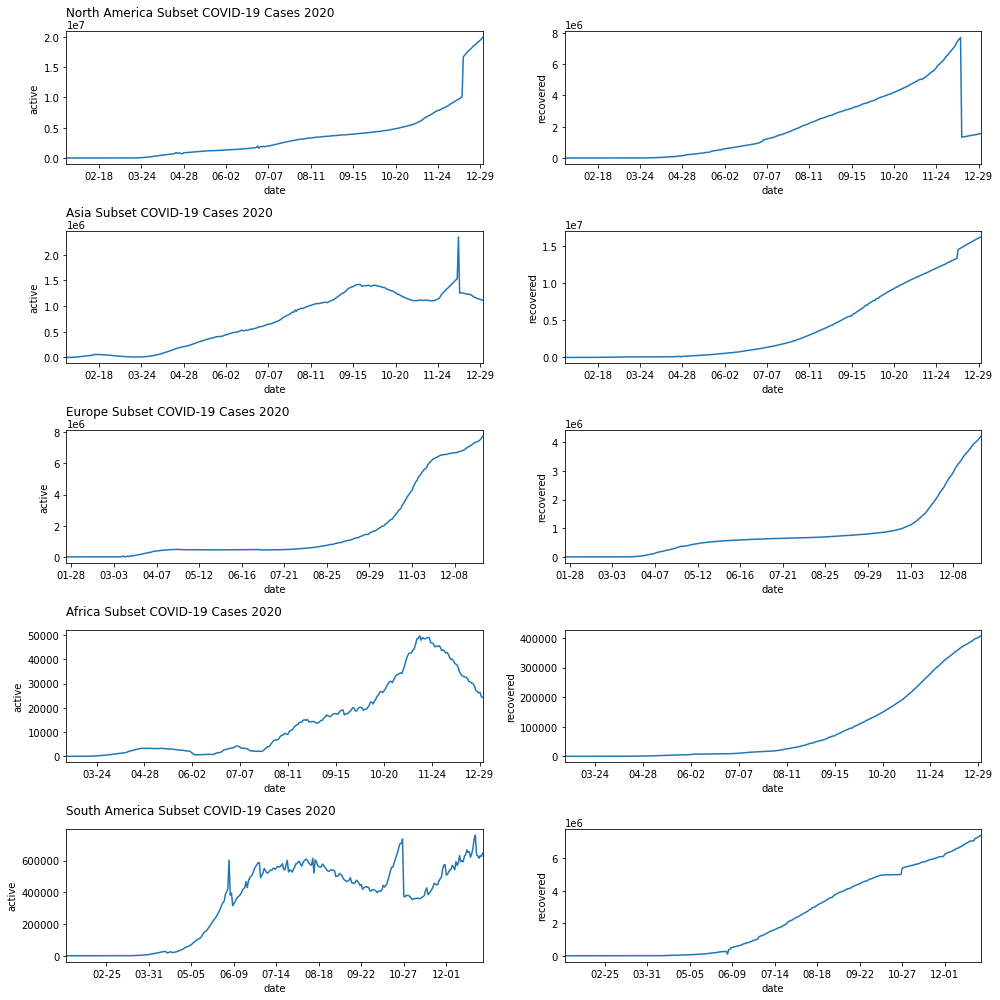

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(14, 14))

# Define the date format
date_form = DateFormatter("%m-%d")

# plotting subplots
sns.lineplot(ax=axes[0,0], data=noam, x='date', y='active', ci=95)
axes[0, 0].set_title('North America Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[0, 0].margins(x=0)
axes[0, 0].xaxis.set_major_formatter(date_form)
axes[0, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[0,1], data=noam, x='date', y='recovered', ci=95)
axes[0, 1].margins(x=0)
axes[0, 1].xaxis.set_major_formatter(date_form)
axes[0, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[1,0], data=asia, x='date', y='active', ci=95)
axes[1, 0].set_title('Asia Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[1, 0].margins(x=0)
axes[1, 0].xaxis.set_major_formatter(date_form)
axes[1, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[1, 1], data=asia, x='date', y='recovered', ci=95)
axes[1, 1].margins(x=0)
axes[1, 1].xaxis.set_major_formatter(date_form)
axes[1, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[2, 0], data=eu, x='date', y='active', ci=95)
axes[2, 0].set_title('Europe Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[2, 0].margins(x=0)
axes[2, 0].xaxis.set_major_formatter(date_form)
axes[2, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[2, 1], data=eu, x='date', y='recovered', ci=95)
axes[2, 1].margins(x=0)
axes[2, 1].xaxis.set_major_formatter(date_form)
axes[2, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[3, 0], data=af, x='date', y='active', ci=95)
axes[3, 0].set_title('Africa Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[3, 0].margins(x=0)
axes[3, 0].xaxis.set_major_formatter(date_form)
axes[3, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[3, 1], data=af, x='date', y='recovered', ci=95)
axes[3, 1].margins(x=0)
axes[3, 1].xaxis.set_major_formatter(date_form)
axes[3, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[4, 0], data=soam, x='date', y='active', ci=95)
axes[4, 0].set_title('South America Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[4, 0].margins(x=0)
axes[4, 0].xaxis.set_major_formatter(date_form)
axes[4, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[4, 1], data=soam, x='date', y='recovered', ci=95)
axes[4, 1].margins(x=0)
axes[4, 1].xaxis.set_major_formatter(date_form)
axes[4, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))


# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()
 
# display plot
plt.show()

In general, a p-value of less than 5% means you can reject the null hyptohesis that there is a unit root. In this case we want to ensure that there are no values that can lead to unpredictable results in the time series. The alternate hypothesis for this data is that the time series *IS* stationary (or trend stationary) 

If we combine differencing with autoregression and moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average. The full model can be written as:
     $y'_t = c + \phi_1y'_{t-1} + ... + \phi_Py'_{t-p} + \theta_1\epsilon_{t-1} + ... + \theta_q\epsilon_{t-q} + \epsilon_t$ 

where $y'_t$ is the differenced series. The predictors on the right include both lagged values of y_t and lagged errors. We call this an **ARIMA(p, d, q) model**, where

    p = order of the autoregressive part
    d = degree of first differencing involved
    q = order of moving average part

## 4.7 ADF Statistic<a id='4.7_ADF_Statistic'></a>

### 4.7.1 Africa Data Confidence Level and Test Statistics<a id='4.7.1_Africa_Data_Confidence_Level_and_Test_Statistics'></a>

In [9]:
result = adfuller(af['recovered'])
result1 = adfuller(af['active'])

In [10]:
print('Africa Sample Recovered ADF Statistic:', result[0])

print('Africa Sample Recovered p-value:', result[1])

print('Africa Sample Recovered critical values:', result[4])

Africa Sample Recovered ADF Statistic: -3.649744518794937
Africa Sample Recovered p-value: 0.004878215578195425
Africa Sample Recovered critical values: {'1%': -3.452636878592149, '5%': -2.8713543954331433, '10%': -2.5719993576515705}


In [11]:
print('Africa Sample Active ADF Statistic:', result1[0])

print('Africa Sample Active p-value:', result1[1])

print('Africa Sample Active critical values:', result1[4])

Africa Sample Active ADF Statistic: -2.048702063599407
Africa Sample Active p-value: 0.2656353252380045
Africa Sample Active critical values: {'1%': -3.4525611751768914, '5%': -2.87132117782556, '10%': -2.5719816428028888}


#### 4.7.1.1 Africa Data Differenced<a id='4.7.1.1_Africa_Data_Differenced'></a>

In [12]:
af_active = af.active.diff().diff().dropna()
result2 = adfuller(af_active)

In [13]:
print('Africa Sample Active ADF Statistic:', result2[0])

print('Africa Sample Active p-value:', result2[1])

print('Africa Sample Active critical values:', result2[4])

Africa Sample Active ADF Statistic: -16.743369716909413
Africa Sample Active p-value: 1.3524670984926477e-29
Africa Sample Active critical values: {'1%': -3.4525611751768914, '5%': -2.87132117782556, '10%': -2.5719816428028888}


### 4.7.2 Asia Data Confidence Level and Test Statistics<a id='4.7.2_Asia_Data_Confidence_Level_and_Test_Statistics'></a>

#### 4.7.2.1 Asia Data Differenced<a id='4.7.2.1_Asia_Data_Differenced'></a>

In [14]:
asia_recovered = asia.recovered.diff().diff().dropna()
result3 = adfuller(asia_recovered)

In [15]:
print('Asia Sample Recovered ADF Statistic:', result3[0])

print('Asia Sample Recovered p-value:', result3[1])

print('Asia Sample Recovered critical values:', result3[4])

Asia Sample Recovered ADF Statistic: -10.804705446646793
Asia Sample Recovered p-value: 1.976821075624385e-19
Asia Sample Recovered critical values: {'1%': -3.450081345901191, '5%': -2.870232621465807, '10%': -2.571401168202517}


In [16]:
asia_active = asia.active.diff().dropna()
result4 = adfuller(asia_active)

In [17]:
print('Asia Sample Active ADF Statistic:', result4[0])

print('Asia Sample Active p-value:', result4[1])

print('Asia Sample Active critical values:', result4[4])

Asia Sample Active ADF Statistic: -15.308256091026506
Asia Sample Active p-value: 4.220857016372562e-28
Asia Sample Active critical values: {'1%': -3.449673193310592, '5%': -2.8700533746644323, '10%': -2.5713055939491403}


### 4.7.3 Europe Data Confidence Level and Test Statistics<a id='4.7.3_Europe_Data_Confidence_Level_and_Test_Statistics'></a>

#### 4.7.3.1 Europe Data Differenced<a id='4.7.3.1_Europe_Data_Differenced'></a>

In [18]:
eu_recovered = eu.recovered.diff().dropna()
result5 = adfuller(eu_recovered)

In [19]:
print('Europe Sample Recovered ADF Statistic:', result5[0])

print('Europe Sample Recovered p-value:', result5[1])

print('Europe Sample Recovered critical values:', result5[4])

Europe Sample Recovered ADF Statistic: -3.4998608710361663
Europe Sample Recovered p-value: 0.007990667906989034
Europe Sample Recovered critical values: {'1%': -3.450632157720528, '5%': -2.870474482366864, '10%': -2.5715301325443787}


In [20]:
eu_active = eu.active.diff().diff().dropna()
result6 = adfuller(eu_active)

In [21]:
print('Europe Sample Active ADF Statistic:', result6[0])

print('Europe Sample Active p-value:', result6[1])

print('Europe Sample Active critical values:', result6[4])

Europe Sample Active ADF Statistic: -3.2047081931553745
Europe Sample Active p-value: 0.019713762914350764
Europe Sample Active critical values: {'1%': -3.45050711373316, '5%': -2.8704195794076743, '10%': -2.571500856923753}


### 4.7.4 North America Data Confidence Level and Test Statistics<a id='4.7.4_North_America_Data_Confidence_Level_and_Test_Statistics'></a>

#### 4.7.4.1 North America Data Differenced<a id='4.7.4.1_North_America_Data_Differenced'></a>

In [22]:
noam_recovered = noam.recovered.diff().dropna()
result7 = adfuller(noam_recovered)

In [23]:
print('North America Sample Recovered ADF Statistic:', result7[0])

print('North America Sample Recovered p-value:', result7[1])

print('North America Sample Recovered critical values:', result7[4])

North America Sample Recovered ADF Statistic: -18.68578078392801
North America Sample Recovered p-value: 2.0406647129059285e-30
North America Sample Recovered critical values: {'1%': -3.449559661646851, '5%': -2.8700035112469626, '10%': -2.5712790073013796}


In [24]:
noam_active = noam.active.diff().dropna()
result8 = adfuller(noam_active)

In [25]:
print('North America Sample Active ADF Statistic:', result8[0])

print('North America Sample Active p-value:', result8[1])

print('North America Sample Active critical values:', result8[4])

North America Sample Active ADF Statistic: -17.37869316948957
North America Sample Active p-value: 5.0878307105718554e-30
North America Sample Active critical values: {'1%': -3.449559661646851, '5%': -2.8700035112469626, '10%': -2.5712790073013796}


### 4.7.5 South America Data Confidence Level and Test Statistics<a id='4.7.5_South_America_Data_Confidence_Level_and_Test_Statistics'></a>

#### 4.7.5.1 South America Data Differenced<a id='4.7.5.1_South_America_Data_Differenced'></a>

In [26]:
soam_recovered = soam.recovered.diff().dropna()
result8 = adfuller(soam_recovered)

In [27]:
print('South America Sample Recovered ADF Statistic:', result8[0])

print('South America Sample Recovered p-value:', result8[1])

print('South America Sample Recovered critical values:', result8[4])

South America Sample Recovered ADF Statistic: -2.4486845531368266
South America Sample Recovered p-value: 0.12846416821939932
South America Sample Recovered critical values: {'1%': -3.4502011472639724, '5%': -2.8702852297358983, '10%': -2.5714292194077513}


In [28]:
soam_active = soam.active.diff().dropna()
result9 = adfuller(soam_active)

In [29]:
print('South America Sample Recovered ADF Statistic:', result9[0])

print('South America Sample Recovered p-value:', result9[1])

print('South America Sample Recovered critical values:', result9[4])

South America Sample Recovered ADF Statistic: -21.826967380965534
South America Sample Recovered p-value: 0.0
South America Sample Recovered critical values: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}


## 4.8 Stationary COVID-19 Cases <a id='4.8_Stationary_COVID-19_Cases'></a>

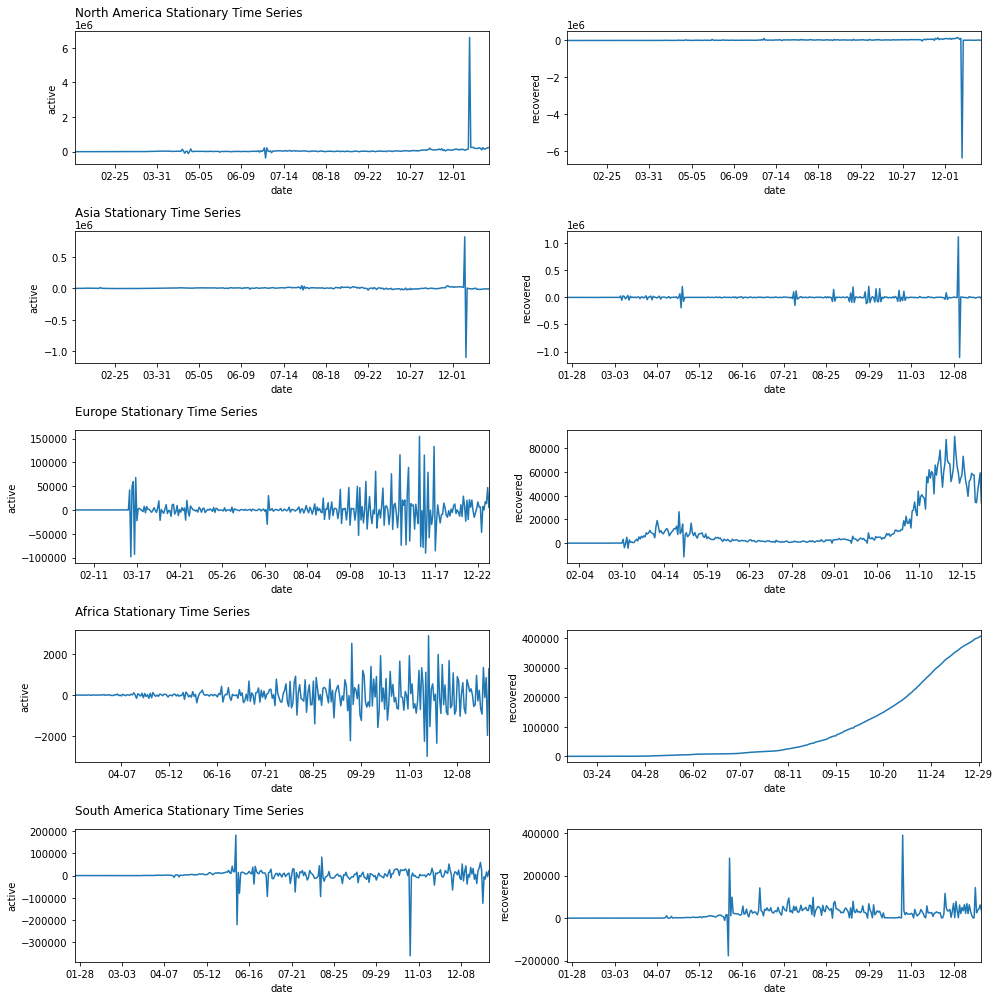

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(14, 14))

# Define the date format
date_form = DateFormatter("%m-%d")

# plotting subplots
sns.lineplot(ax=axes[0,0], data=noam_active, ci=95)
axes[0, 0].set_title('North America Stationary Time Series', loc='left', pad=15)
axes[0, 0].margins(x=0)
axes[0, 0].xaxis.set_major_formatter(date_form)
axes[0, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[0,1], data=noam_recovered, ci=95)
axes[0, 1].margins(x=0)
axes[0, 1].xaxis.set_major_formatter(date_form)
axes[0, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[1,0], data=asia_active, ci=95)
axes[1, 0].set_title('Asia Stationary Time Series', loc='left', pad=15)
axes[1, 0].margins(x=0)
axes[1, 0].xaxis.set_major_formatter(date_form)
axes[1, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[1, 1], data=asia_recovered, ci=95)
axes[1, 1].margins(x=0)
axes[1, 1].xaxis.set_major_formatter(date_form)
axes[1, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[2, 0], data=eu_active, ci=95)
axes[2, 0].set_title('Europe Stationary Time Series', loc='left', pad=15)
axes[2, 0].margins(x=0)
axes[2, 0].xaxis.set_major_formatter(date_form)
axes[2, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[2, 1], data=eu_recovered, ci=95)
axes[2, 1].margins(x=0)
axes[2, 1].xaxis.set_major_formatter(date_form)
axes[2, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[3, 0], data=af_active, ci=95)
axes[3, 0].set_title('Africa Stationary Time Series', loc='left', pad=15)
axes[3, 0].margins(x=0)
axes[3, 0].xaxis.set_major_formatter(date_form)
axes[3, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[3, 1], data=af['recovered'], ci=95)
axes[3, 1].margins(x=0)
axes[3, 1].xaxis.set_major_formatter(date_form)
axes[3, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[4, 0], data=soam_active, ci=95)
axes[4, 0].set_title('South America Stationary Time Series', loc='left', pad=15)
axes[4, 0].margins(x=0)
axes[4, 0].xaxis.set_major_formatter(date_form)
axes[4, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[4, 1], data=soam_recovered, ci=95)
axes[4, 1].margins(x=0)
axes[4, 1].xaxis.set_major_formatter(date_form)
axes[4, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))


# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()
 
# display plot
plt.show()

## 4.9 Box-Cox Transformation <a id='4.9_Box-Cox_Transformation'></a>

The datasets are right-tail skewed and to gain a more accurate prediction we can modify the distribution to a normal curve. To do this the Box-Cox transform is given by: $ y = \frac{x^\lambda - 1}{\lambda}, for \lambda !=0$, $ log(x), for \lambda = 0 $

The confidence limits returned when alpha is provided give the interval where: $ llf(\hat{\lambda}) - llf(\lambda) < \frac{1}{2}x^2(1 - \alpha, 1) $ 
    
with llf the log-liklihood function and $X^2$ the chi-squared function.


In [31]:
#preparing data for boxcox transform
#Africa Recovered 
ar = af['recovered'][af['recovered'] != 0]
ar.to_csv("../data/pre_bc_afr.csv")

#Africa Active
af['active'].to_csv("../data/pre_bc_afa.csv")

#Asia Recovered
asia['recovered'].to_csv("../data/pre_bc_asr.csv")

#Asia Active
asia['active'].to_csv("../data/pre_bc_asa.csv")

#Europe Recovered
er = eu['recovered'][eu['recovered'] != 0]
er.to_csv("../data/pre_bc_er.csv")

#Europe Active
ea = eu['active'][eu['active'] != 0]
ea.to_csv("../data/pre_bc_ea.csv")

#North America Recovered 
nr = noam['recovered'][noam['recovered'] != 0]
nr.to_csv("../data/pre_bc_nr.csv")

#North America Active 
na = noam['active'][noam['active'] != 0]
na.to_csv("../data/pre_bc_na.csv")

#South America Recovered 
sr = soam['recovered'][soam['recovered'] != 0]
sr.to_csv("../data/pre_bc_sr.csv")

#South America Active 
sa = soam['active'][soam['active'] != 0]
sa.to_csv("../data/pre_bc_sa.csv")

In [32]:
ar

date
2020-03-13         1.0
2020-03-14         1.0
2020-03-15         1.0
2020-03-16         1.0
2020-03-17         1.0
                ...   
2020-12-27    398060.0
2020-12-28    399575.0
2020-12-29    401429.0
2020-12-30    405251.0
2020-12-31    407504.0
Freq: D, Name: recovered, Length: 294, dtype: float64

## 4.10 Assess model performance <a id='4.10_Assess_model_performance'></a>

In [33]:
###Function modified from Case springboard/1585014009

# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split=int(len(data) * 0.7) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions. Declare a variable with that name
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        past_bc, fitted_lambda = stats.boxcox(past)
        test_bc = stats.boxcox(test, fitted_lambda)
        model = ARIMA(past_bc, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        # Append() here
        predictions.append(future)
        past.append(test_bc[i])
    # calculate out of sample error
    error = mean_squared_error(test_bc, predictions)
    # Return the error
    return error

In [34]:
###Function modified from Case springboard/1585014009

# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [35]:
# Now, we choose a couple of values to try for each parameter: p_values, d_values and q_values
# Fill in the blanks as appropriate
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [36]:
def pickle_best_model(data, arima_order, filename):

    # Save Model Using Pickle
    # Fit the model on training set with best order
    model = ARIMA(data, order=arima_order)
    model_fit = model.fit(disp=0)
    model_fit.version = '1.0'
    model_fit.pandas_version = pd.__version__
    model_fit.numpy_version = np.__version__
    model_fit.sklearn_version = sklearn_version
    model_fit.statsmodels_version = statsmodels_version
    model_fit.scipy_version = scipy_version
    model_fit.build_datetime = datetime.datetime.now()
    
    # save the model to disk - write binary
    ##filename = 'finalized_model.sav'
    pickle.dump(model_fit, open(filename, 'wb'))

### 4.10.1 Optimal ARIMA Model-Africa recovered<a id='4.10.1_Optimal_ARIMA_Model-Africa_recovered'></a>

In [37]:
# Find the optimum ARIMA model for our Africa recovered sample.
import warnings
warnings.filterwarnings("ignore")
evaluate_models(ar, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=40.532
ARIMA(0, 0, 1) MSE=95.020
ARIMA(0, 0, 2) MSE=150.741
ARIMA(0, 1, 0) MSE=165.842
ARIMA(0, 1, 1) MSE=165.836
ARIMA(0, 1, 2) MSE=168.310
ARIMA(0, 2, 0) MSE=200.310
ARIMA(0, 2, 1) MSE=186.949
ARIMA(0, 2, 2) MSE=188.534
ARIMA(1, 0, 0) MSE=164.190
ARIMA(1, 0, 1) MSE=167.556
ARIMA(1, 0, 2) MSE=171.141
ARIMA(1, 1, 0) MSE=165.831
ARIMA(1, 2, 0) MSE=209.703
ARIMA(1, 2, 1) MSE=195.289
ARIMA(2, 0, 0) MSE=170.195
ARIMA(2, 1, 0) MSE=167.750
ARIMA(2, 2, 0) MSE=214.859
Best ARIMA(0, 0, 0) MSE=40.532


In [38]:
pickle_best_model(ar, (0, 0, 0), '../models/af_rec_model.sav')

### 4.10.2 Optimal ARIMA Model-Africa active<a id='4.10.2_Optimal_ARIMA_Model-Africa_active'></a>

In [39]:
# Find the optimum ARIMA model for our Africa active sample.
evaluate_models(af.active, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=45.804
ARIMA(0, 0, 1) MSE=96.204
ARIMA(0, 1, 0) MSE=183.350
ARIMA(0, 1, 1) MSE=187.843
ARIMA(0, 1, 2) MSE=205.172
ARIMA(0, 2, 0) MSE=216.664
ARIMA(0, 2, 1) MSE=206.872
ARIMA(0, 2, 2) MSE=216.473
ARIMA(1, 0, 0) MSE=181.621
ARIMA(1, 0, 1) MSE=186.248
ARIMA(1, 0, 2) MSE=201.721
ARIMA(1, 1, 0) MSE=196.465
ARIMA(1, 1, 1) MSE=194.390
ARIMA(1, 1, 2) MSE=211.601
ARIMA(1, 2, 0) MSE=218.817
ARIMA(1, 2, 2) MSE=234.193
ARIMA(2, 0, 0) MSE=194.656
ARIMA(2, 1, 0) MSE=202.626
ARIMA(2, 1, 1) MSE=204.878
ARIMA(2, 1, 2) MSE=201.378
ARIMA(2, 2, 0) MSE=239.817
Best ARIMA(0, 0, 0) MSE=45.804


In [40]:
pickle_best_model(af.active, (0, 0, 0), '../models/af_act_model.sav')

### 4.10.3 Optimal ARIMA Model-Asia recovered<a id='4.10.3_Optimal_ARIMA_Model-Asia_recovered'></a>

In [41]:
# Find the optimum ARIMA model for our Asia recovered sample.
evaluate_models(asia.recovered, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=153.743
ARIMA(0, 0, 1) MSE=245.655
ARIMA(0, 0, 2) MSE=379.493
ARIMA(0, 1, 0) MSE=591.412
ARIMA(0, 1, 1) MSE=588.629
ARIMA(0, 1, 2) MSE=599.003
ARIMA(0, 2, 0) MSE=689.793
ARIMA(0, 2, 1) MSE=616.559
ARIMA(0, 2, 2) MSE=629.560
ARIMA(1, 0, 0) MSE=580.254
ARIMA(1, 0, 1) MSE=576.531
ARIMA(1, 0, 2) MSE=582.591
ARIMA(1, 1, 0) MSE=589.404
ARIMA(1, 1, 1) MSE=591.508
ARIMA(1, 2, 0) MSE=700.398
ARIMA(2, 0, 0) MSE=576.731
ARIMA(2, 0, 1) MSE=584.264
ARIMA(2, 1, 0) MSE=594.248
ARIMA(2, 2, 0) MSE=708.886
Best ARIMA(0, 0, 0) MSE=153.743


In [42]:
pickle_best_model(asia.recovered, (0, 0, 0), '../models/asia_rec_model.sav')

### 4.10.4 Optimal ARIMA Model-Asia active<a id='4.10.4_Optimal_ARIMA_Model-Asia_active'></a>

In [43]:
# Find the optimum ARIMA model for our Asia active sample.
evaluate_models(asia.active, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1769.612
ARIMA(0, 0, 1) MSE=1042.332
ARIMA(0, 1, 0) MSE=1075.082
ARIMA(0, 1, 1) MSE=1166.332
ARIMA(0, 1, 2) MSE=1308.191
ARIMA(0, 2, 0) MSE=1575.855
ARIMA(0, 2, 1) MSE=1456.492
ARIMA(0, 2, 2) MSE=1524.994
ARIMA(1, 0, 0) MSE=1047.002
ARIMA(1, 0, 1) MSE=1140.055
ARIMA(1, 0, 2) MSE=1270.690
ARIMA(1, 1, 0) MSE=1252.728
ARIMA(1, 2, 0) MSE=1895.261
ARIMA(1, 2, 1) MSE=1564.971
ARIMA(2, 0, 0) MSE=1202.713
ARIMA(2, 1, 0) MSE=1292.742
ARIMA(2, 2, 0) MSE=2061.407
Best ARIMA(0, 0, 1) MSE=1042.332


In [44]:
pickle_best_model(asia.active, (0, 0, 1), '../models/asia_act_model.sav')

### 4.10.5 Optimal ARIMA Model-Europe recovered<a id='4.10.5_Optimal_ARIMA_Model-Europe_recovered'></a>

In [45]:
# Find the optimum ARIMA model for our Europe recovered sample.
evaluate_models(er, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=168743.599
ARIMA(0, 0, 1) MSE=108526.658
ARIMA(0, 0, 2) MSE=135088.989
ARIMA(0, 1, 0) MSE=54166.718
ARIMA(0, 1, 1) MSE=54267.941
ARIMA(0, 1, 2) MSE=61966.799
ARIMA(0, 2, 0) MSE=94192.171
ARIMA(0, 2, 1) MSE=55681.901
ARIMA(1, 0, 0) MSE=53717.626
ARIMA(1, 0, 1) MSE=53708.341
ARIMA(1, 0, 2) MSE=61186.010
ARIMA(1, 1, 0) MSE=54450.104
ARIMA(1, 1, 2) MSE=58458.245
ARIMA(1, 2, 0) MSE=88240.012
ARIMA(1, 2, 1) MSE=66123.184
ARIMA(1, 2, 2) MSE=67924.505
ARIMA(2, 0, 0) MSE=53699.828
ARIMA(2, 1, 0) MSE=61811.585
ARIMA(2, 2, 0) MSE=94045.331
ARIMA(2, 2, 1) MSE=71473.446
Best ARIMA(2, 0, 0) MSE=53699.828


In [46]:
pickle_best_model(er, (2, 0, 0), '../models/eu_rec_model.sav')

### 4.10.6 Optimal ARIMA Model-Europe active<a id='4.10.6_Optimal_ARIMA_Model-Europe active'></a>

In [47]:
# Find the optimum ARIMA model for our Europe active sample.
evaluate_models(ea, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=33459.195
ARIMA(0, 0, 1) MSE=23851.168
ARIMA(0, 0, 2) MSE=24357.104
ARIMA(0, 1, 0) MSE=13982.572
ARIMA(0, 1, 1) MSE=16554.345
ARIMA(0, 1, 2) MSE=20064.723
ARIMA(0, 2, 0) MSE=25647.683
ARIMA(0, 2, 1) MSE=14062.505
ARIMA(0, 2, 2) MSE=18909.381
ARIMA(1, 0, 0) MSE=13823.487
ARIMA(1, 0, 1) MSE=15617.862
ARIMA(1, 0, 2) MSE=18935.575
ARIMA(1, 1, 0) MSE=16647.012
ARIMA(1, 1, 1) MSE=18084.567
ARIMA(1, 2, 0) MSE=23181.754
ARIMA(2, 0, 0) MSE=16054.381
ARIMA(2, 0, 1) MSE=16819.986
ARIMA(2, 1, 0) MSE=18685.993
ARIMA(2, 1, 1) MSE=17856.056
ARIMA(2, 2, 0) MSE=21477.572
ARIMA(2, 2, 1) MSE=19859.285
Best ARIMA(1, 0, 0) MSE=13823.487


In [48]:
pickle_best_model(ea, (1, 0, 0), '../models/eu_act_model.sav')

### 4.10.7 Optimal ARIMA Model-North America recovered<a id='4.10.7_Optimal_ARIMA_Model-North_America_recovered'></a>

In [49]:
# Find the optimum ARIMA model for our North America recovered sample.
evaluate_models(nr, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=825.073
ARIMA(0, 0, 1) MSE=668.836
ARIMA(0, 1, 0) MSE=610.567
ARIMA(0, 1, 1) MSE=643.703
ARIMA(0, 1, 2) MSE=647.722
ARIMA(0, 2, 0) MSE=946.231
ARIMA(0, 2, 1) MSE=703.283
ARIMA(0, 2, 2) MSE=746.359
ARIMA(1, 0, 0) MSE=599.455
ARIMA(1, 0, 1) MSE=636.271
ARIMA(1, 0, 2) MSE=643.574
ARIMA(1, 1, 0) MSE=647.008
ARIMA(1, 1, 1) MSE=622.559
ARIMA(1, 1, 2) MSE=643.870
ARIMA(1, 2, 0) MSE=1065.538
ARIMA(1, 2, 1) MSE=982.133
ARIMA(2, 0, 0) MSE=639.207
ARIMA(2, 0, 1) MSE=617.836
ARIMA(2, 1, 0) MSE=649.889
ARIMA(2, 1, 2) MSE=647.643
ARIMA(2, 2, 0) MSE=1064.358
ARIMA(2, 2, 1) MSE=757.507
Best ARIMA(1, 0, 0) MSE=599.455


In [50]:
pickle_best_model(nr, (1, 0, 0), '../models/noam_rec_model.sav')

### 4.10.8 Optimal ARIMA Model-North America active<a id='4.10.8_Optimal_ARIMA_Model-North_America_active'></a>

In [51]:
# Find the optimum ARIMA model for our North America active sample.
evaluate_models(na, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=3361.916
ARIMA(0, 0, 1) MSE=2263.162
ARIMA(0, 0, 2) MSE=2963.684
ARIMA(0, 1, 0) MSE=1397.040
ARIMA(0, 1, 1) MSE=1396.953
ARIMA(0, 1, 2) MSE=1397.213
ARIMA(0, 2, 0) MSE=2377.636
ARIMA(0, 2, 1) MSE=1472.256
ARIMA(0, 2, 2) MSE=1493.521
ARIMA(1, 0, 0) MSE=1378.810
ARIMA(1, 0, 1) MSE=1380.292
ARIMA(1, 0, 2) MSE=1381.729
ARIMA(1, 1, 0) MSE=1396.783
ARIMA(1, 1, 1) MSE=1396.939
ARIMA(1, 1, 2) MSE=1468.757
ARIMA(1, 2, 0) MSE=2476.083
ARIMA(2, 0, 0) MSE=1380.427
ARIMA(2, 1, 0) MSE=1397.684
ARIMA(2, 2, 0) MSE=2336.859
ARIMA(2, 2, 1) MSE=1519.622
Best ARIMA(1, 0, 0) MSE=1378.810


In [52]:
pickle_best_model(na, (1, 0, 0), '../models/noam_act_model.sav')

### 4.10.9 Optimal ARIMA Model-South America recovered<a id='4.10.7_Optimal_ARIMA_Model-South_America_recovered'></a>

In [53]:
# Find the optimum ARIMA model for our South America recovered sample.
evaluate_models(sr, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=577.400
ARIMA(0, 0, 1) MSE=438.310
ARIMA(0, 0, 2) MSE=622.115
ARIMA(0, 1, 0) MSE=580.297
ARIMA(0, 1, 1) MSE=580.843
ARIMA(0, 1, 2) MSE=589.595
ARIMA(0, 2, 0) MSE=850.592
ARIMA(0, 2, 1) MSE=612.160
ARIMA(0, 2, 2) MSE=611.851
ARIMA(1, 0, 0) MSE=571.080
ARIMA(1, 0, 1) MSE=568.733
ARIMA(1, 0, 2) MSE=578.914
ARIMA(1, 1, 0) MSE=582.585
ARIMA(1, 1, 1) MSE=582.734
ARIMA(1, 2, 0) MSE=858.082
ARIMA(1, 2, 1) MSE=627.864
ARIMA(1, 2, 2) MSE=624.018
ARIMA(2, 0, 0) MSE=569.701
ARIMA(2, 1, 0) MSE=589.425
ARIMA(2, 2, 0) MSE=861.295
ARIMA(2, 2, 1) MSE=637.557
Best ARIMA(0, 0, 1) MSE=438.310


In [54]:
pickle_best_model(sr, (0, 0, 1), '../models/soam_rec_model.sav')

### 4.10.10 Optimal ARIMA Model-South America active<a id='4.10.7_Optimal_ARIMA_Model-South_America_active'></a>

In [55]:
# Find the optimum ARIMA model for our South America active sample.
evaluate_models(sa, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=10744.141
ARIMA(0, 0, 1) MSE=5456.630
ARIMA(0, 0, 2) MSE=5165.090
ARIMA(0, 1, 0) MSE=2618.810
ARIMA(0, 1, 1) MSE=2658.932
ARIMA(0, 1, 2) MSE=2797.446
ARIMA(0, 2, 0) MSE=4540.380
ARIMA(0, 2, 1) MSE=2651.661
ARIMA(0, 2, 2) MSE=2715.025
ARIMA(1, 0, 0) MSE=2588.142
ARIMA(1, 0, 1) MSE=2617.186
ARIMA(1, 0, 2) MSE=2754.236
ARIMA(1, 1, 0) MSE=2701.402
ARIMA(1, 1, 1) MSE=2701.061
ARIMA(1, 2, 0) MSE=4166.902
ARIMA(1, 2, 1) MSE=2852.845
ARIMA(1, 2, 2) MSE=2842.462
ARIMA(2, 0, 0) MSE=2655.455
ARIMA(2, 0, 1) MSE=2666.989
ARIMA(2, 1, 0) MSE=2845.800
ARIMA(2, 1, 1) MSE=2955.311
ARIMA(2, 1, 2) MSE=2827.328
ARIMA(2, 2, 0) MSE=4238.435
Best ARIMA(1, 0, 0) MSE=2588.142


In [56]:
pickle_best_model(sa, (1, 0, 0), '../models/soam_act_model.sav')